In [1]:
import numpy as np
import pandas as pd

TopOMetry (Topologically Optimized geoMetry, [github](https://github.com/davisidarta/topometry), 
[bioarxiv](https://www.biorxiv.org/content/10.1101/2022.03.14.484134v4)) is a method that 
distinguishes itself by generating a spectral embedding first (crucially in a large subspace, by 
default up to 100), then re-calculates nearest neighbors in this embedded space, and only then does
the embedding to 2D using affinities calculated based on those new neighbors and distances -- this
is one of the uses of Diffusion Maps, but you are not restricted to exactly DM's graph laplacian
definition. It is also very configurable in terms of (among other things) which nearest neighbor 
method, type of graph laplacian and embedding method you can use.

Because of the intermediate spectral embedding step, it's not obvious how many of the eigenvectors
to keep ahead of time: the value of 100 eigenvectors can be thought of as an initial guess at an
upper bound, so there is also a lot of support for visualizing the eigenvalues.

So it's a bit difficult to fully use TopOMetry at its full power within `drnb` and I have made no
attempt to install all the possible extra dependencies. A reasonable seeming default is to use
`pynndescent` for the nearest neighbor search, given that a UMAP-like embedding is the default
embedding step, but as of writing (November 2025), there may be a bug in the parsing of the nearest
neighbor backed options, because `"pynndescent"` is not supported, despite being advertised as 
such. So I use `hnswlib` instead.

Note also that unlike many other methods, the default distance metric is cosine rather then
Euclidean.

## Options

A selection of possible options are below. These map straight to the `params` dict. For more details
you will need to peruse the TopOMetry docs or paper.

* `base_knn`: the number of nearest neighbors to use. Defaults to `30`.
* `graph_knn`: the number of nearest neighbors used. Also defaults to `30`.
* `n_eigs`: the number of eigenvectors to compute during the initial phase. This is roughly
analogous to the number of principal components to extract when doing PCA pre-processing. The
default is `100` but that doesn't mean you should keep all 100 for downstream work. There are lots
of visualizations and other tools provided by TopOMetry to help with this stage, but unfortunately
those aren't going to be of use to us in our pipeline. If the dimension of your data is smaller
than 100, only the maximum possible number of eigenvectors is extracted.
* `eigenmap_method` the type of spectral method to use. By default `DM` which is Diffusion Maps.
Other choices are: `msDM` (a multiscale diffusion map), `LE` (probably the same as Laplacian 
Eigenmaps), `top` (not sure) and `bottom` (ditto).
* `alpha`: the anisotropy setting. In the diffusion maps literature this is used to control how
much sampling density affects the layout, where 0 includes density (and behaves like Laplacian
Eigenmaps), and 1 ignores density. Default is `1`.
* `laplacian_type`: how the graph Laplacian is formed. One of `'unnormalized'`, `'normalized'`, 
`'random_walk'` or `'geometric'` (default is `'random_walk'`).
* `base_kernel_version`: the type of kernel used to build the affinities in the graph laplacian.
One of: `'fuzzy'`, `'cknn'`, `'bw_adaptive'`, `'bw_adaptive_alpha_decaying'`, 
`'bw_adaptive_nbr_expansion'`, `'bw_adaptive_alpha_decaying_nbr_expansion'` and `gaussian`. Some
of these may have other parameters you can set. Default is `'bw_adaptive'`. The `bw` seems to mean
"bandwidth", so it's an adapative bandwidth kernel for the default.
* `graph_kernel_version`: the kernel to use to build the affinities in the graph being optimized for
layout. Same options as with `base_kernel_version`. Default is `'bw_adaptive_alpha_decaying'`.
* `base_metric`: distance metric when finding nearest neighbors for the graph laplacian. Defaults to
`'cosine'`.
* `graph_metric`: distance metric when finding nearest neighbors in the projected spectral space.
Default is `'euclidean'`.
* `n_jobs`: number of threads to use. Defaults to `1`.
* `projection_method`: the method to use when embedding the spectral space: one of `'Isomap'`,
`'t-SNE'` or `'MAP'`. The default is `'MAP'`, and is basically UMAP-style optimization.
* `verbosity` an int between 0 and 3. Default is `1`.

In [2]:
import drnb.embed.pipeline as pl

embed_pipeline = pl.create_pipeline(
    method=pl.embedder("topometry", params=dict(verbosity=3)),
    verbose=True,
)

/home/james/dev/drnb-plugin/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


[18:29:44] INFO     Getting dataset s1k                                              ]8;id=356811;file:///home/james/dev/drnb-plugin/src/drnb/embed/pipeline.py\pipeline.py]8;;\:]8;id=45150;file:///home/james/dev/drnb-plugin/src/drnb/embed/pipeline.py#246\246]8;;\

           INFO     Embedding                                                        ]8;id=673680;file:///home/james/dev/drnb-plugin/src/drnb/embed/pipeline.py\pipeline.py]8;;\:]8;id=32768;file:///home/james/dev/drnb-plugin/src/drnb/embed/pipeline.py#249\249]8;;\

[18:29:45] INFO     [external:topometry] launching: /home/james/.local/bin/uv run    ]8;id=506356;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=528714;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#232\232]8;;\
                    --color never --quiet drnb-plugin-run.py --method topometry                     
                    --request /tmp/drnb-topometry-v0rfp4s6/request.json                             

[18:29:47] INFO     Running topometry with params={'verbosity': 3}                   ]8;id=814544;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=296573;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#345\345]8;;\

           INFO     Setting n_eigs to 9                                              ]8;id=646219;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=465066;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#345\345]8;;\

           INFO     Computing neighborhood graph...                                  ]8;id=602735;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=464187;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#345\345]8;;\

           INFO      Base kNN graph computed in 0.090768 (sec)                       ]8;id=899164;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=483725;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#345\345]8;;\

           INFO      Fitted the bw_adaptive kernel in 0.125477 (sec)                 ]8;id=352922;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=804517;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#345\345]8;;\

           INFO     Computing eigenbasis...                                          ]8;id=967548;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=856910;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#345\345]8;;\

           INFO      Fitted eigenbasis with Diffusion Maps from the bw_adaptive      ]8;id=135202;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=486325;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#345\345]8;;\
                    kernel in 0.007863 (sec)                                                        

[18:29:48] INFO         Building topological graph from eigenbasis...                ]8;id=485821;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=419410;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#345\345]8;;\

           INFO             Computing neighborhood graph...                          ]8;id=326116;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=111328;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#345\345]8;;\

           INFO      Computed in 0.022651 (sec)                                      ]8;id=709976;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=763935;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#345\345]8;;\

           INFO      Fitted the bw_adaptive graph kernel in 0.124058 (sec)           ]8;id=282009;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=449562;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#345\345]8;;\

[18:29:52] INFO      Computed MAP in 4.000773 (sec)                                  ]8;id=760346;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=353506;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#345\345]8;;\

           INFO     Evaluating                                                       ]8;id=671987;file:///home/james/dev/drnb-plugin/src/drnb/embed/pipeline.py\pipeline.py]8;;\:]8;id=50941;file:///home/james/dev/drnb-plugin/src/drnb/embed/pipeline.py#271\271]8;;\

           INFO     Plotting                                                         ]8;id=74071;file:///home/james/dev/drnb-plugin/src/drnb/embed/pipeline.py\pipeline.py]8;;\:]8;id=258166;file:///home/james/dev/drnb-plugin/src/drnb/embed/pipeline.py#281\281]8;;\

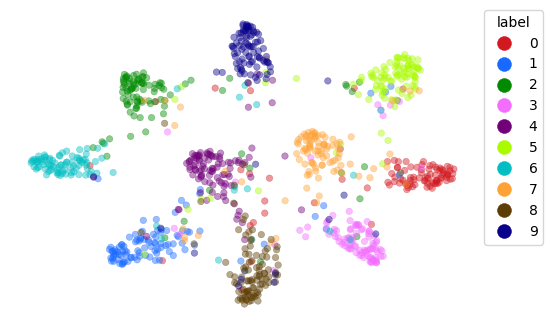

In [3]:
embed_result = embed_pipeline.run("s1k")

[18:29:53] INFO     Getting dataset mnist                                            ]8;id=937424;file:///home/james/dev/drnb-plugin/src/drnb/embed/pipeline.py\pipeline.py]8;;\:]8;id=15323;file:///home/james/dev/drnb-plugin/src/drnb/embed/pipeline.py#246\246]8;;\

[18:29:55] INFO     Embedding                                                        ]8;id=979235;file:///home/james/dev/drnb-plugin/src/drnb/embed/pipeline.py\pipeline.py]8;;\:]8;id=610395;file:///home/james/dev/drnb-plugin/src/drnb/embed/pipeline.py#249\249]8;;\

           INFO     [external:topometry] launching: /home/james/.local/bin/uv run    ]8;id=425294;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=352396;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#232\232]8;;\
                    --color never --quiet drnb-plugin-run.py --method topometry                     
                    --request /tmp/drnb-topometry-koqxj0h9/request.json                             

[18:29:59] INFO     Running topometry with params={'verbosity': 3}                   ]8;id=363016;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=433282;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#345\345]8;;\

           INFO     Setting n_eigs to 100                                            ]8;id=75790;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=551163;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#345\345]8;;\

           INFO     Computing neighborhood graph...                                  ]8;id=46362;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=106721;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#345\345]8;;\

[18:30:25] INFO      Base kNN graph computed in 26.154626 (sec)                      ]8;id=402770;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=276814;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#345\345]8;;\

[18:30:26] INFO      Fitted the bw_adaptive kernel in 1.031021 (sec)                 ]8;id=799989;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=870129;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#345\345]8;;\

           INFO     Computing eigenbasis...                                          ]8;id=741276;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=767276;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#345\345]8;;\

[18:31:15] INFO      Fitted eigenbasis with Diffusion Maps from the bw_adaptive      ]8;id=555614;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=661;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#345\345]8;;\
                    kernel in 48.791999 (sec)                                                       

           INFO         Building topological graph from eigenbasis...                ]8;id=989759;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=736235;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#345\345]8;;\

           INFO             Computing neighborhood graph...                          ]8;id=871649;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=759890;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#345\345]8;;\

[18:31:20] INFO      Computed in 5.227595 (sec)                                      ]8;id=151373;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=947288;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#345\345]8;;\

[18:31:21] INFO      Fitted the bw_adaptive graph kernel in 1.102406 (sec)           ]8;id=401609;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=674381;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#345\345]8;;\

[18:32:31] INFO      Computed MAP in 30.708611 (sec)                                 ]8;id=780614;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=711160;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#345\345]8;;\

[18:32:32] INFO     Evaluating                                                       ]8;id=984249;file:///home/james/dev/drnb-plugin/src/drnb/embed/pipeline.py\pipeline.py]8;;\:]8;id=393234;file:///home/james/dev/drnb-plugin/src/drnb/embed/pipeline.py#271\271]8;;\

           INFO     Plotting                                                         ]8;id=735773;file:///home/james/dev/drnb-plugin/src/drnb/embed/pipeline.py\pipeline.py]8;;\:]8;id=239729;file:///home/james/dev/drnb-plugin/src/drnb/embed/pipeline.py#281\281]8;;\

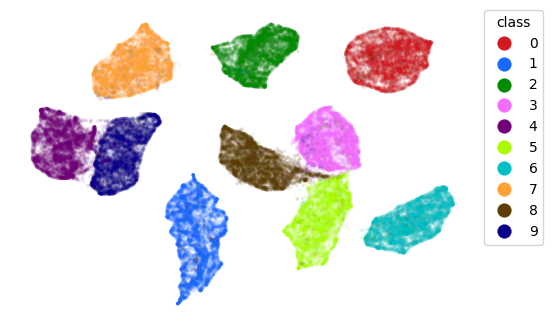

In [4]:
embed_result = embed_pipeline.run("mnist")

The TopOMetry repo and paper mention scRNA-seq specifically, so here are some examples. However,
in an [issue in the TopOMetry repo](https://github.com/davisidarta/topometry/issues/14#issuecomment-1845248867)
creator David Sidarta Oliveira mentions that the data should be scaled in the style of
[scanpy](https://scanpy.readthedocs.io/en/stable/)'s `sc.pp.scale(adata, max_value=10)` which I
think means Z-scaling and then clipping any values with a magnitude greater than 10. The data below
doesn't follow this, so it may not be a fair representation (`macosko2015z` is Z-scaled but not 
clipped).

[18:35:53] INFO     Getting dataset macosko2015z                                     ]8;id=302995;file:///home/james/dev/drnb-plugin/src/drnb/embed/pipeline.py\pipeline.py]8;;\:]8;id=803707;file:///home/james/dev/drnb-plugin/src/drnb/embed/pipeline.py#246\246]8;;\

[18:35:56] INFO     Embedding                                                        ]8;id=853665;file:///home/james/dev/drnb-plugin/src/drnb/embed/pipeline.py\pipeline.py]8;;\:]8;id=215784;file:///home/james/dev/drnb-plugin/src/drnb/embed/pipeline.py#249\249]8;;\

           INFO     [external:topometry] launching: /home/james/.local/bin/uv run    ]8;id=205798;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=102507;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#232\232]8;;\
                    --color never --quiet drnb-plugin-run.py --method topometry                     
                    --request /tmp/drnb-topometry-lsryoysh/request.json                             

[18:36:02] INFO     Running topometry with params={'verbosity': 3}                   ]8;id=527157;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=355684;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#345\345]8;;\

           INFO     Setting n_eigs to 100                                            ]8;id=583171;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=107553;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#345\345]8;;\

           INFO     Computing neighborhood graph...                                  ]8;id=23764;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=327462;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#345\345]8;;\

[18:37:27] INFO      Base kNN graph computed in 85.128135 (sec)                      ]8;id=235283;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=766080;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#345\345]8;;\

[18:37:28] INFO      Fitted the bw_adaptive kernel in 0.617868 (sec)                 ]8;id=517523;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=615933;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#345\345]8;;\

           INFO     Computing eigenbasis...                                          ]8;id=565267;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=341469;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#345\345]8;;\

[18:37:52] INFO      Fitted eigenbasis with Diffusion Maps from the bw_adaptive      ]8;id=283906;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=546222;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#345\345]8;;\
                    kernel in 23.857157 (sec)                                                       

           INFO         Building topological graph from eigenbasis...                ]8;id=986690;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=843176;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#345\345]8;;\

           INFO             Computing neighborhood graph...                          ]8;id=295652;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=233275;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#345\345]8;;\

[18:37:55] INFO      Computed in 2.995386 (sec)                                      ]8;id=542127;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=588690;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#345\345]8;;\

[18:37:56] INFO      Fitted the bw_adaptive graph kernel in 0.684402 (sec)           ]8;id=4905;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=358960;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#345\345]8;;\

[18:38:33] INFO      Computed MAP in 16.197586 (sec)                                 ]8;id=410585;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=318868;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#345\345]8;;\

[18:38:34] INFO     Evaluating                                                       ]8;id=99252;file:///home/james/dev/drnb-plugin/src/drnb/embed/pipeline.py\pipeline.py]8;;\:]8;id=715900;file:///home/james/dev/drnb-plugin/src/drnb/embed/pipeline.py#271\271]8;;\

           INFO     Plotting                                                         ]8;id=926723;file:///home/james/dev/drnb-plugin/src/drnb/embed/pipeline.py\pipeline.py]8;;\:]8;id=443521;file:///home/james/dev/drnb-plugin/src/drnb/embed/pipeline.py#281\281]8;;\

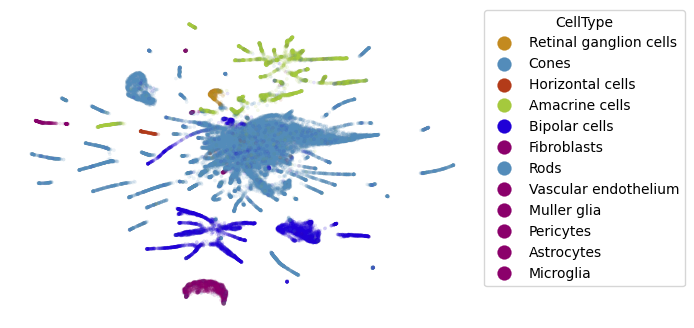

In [6]:
embed_result = embed_pipeline.run("macosko2015z")

[18:38:35] INFO     Getting dataset tasic2018                                        ]8;id=33819;file:///home/james/dev/drnb-plugin/src/drnb/embed/pipeline.py\pipeline.py]8;;\:]8;id=12298;file:///home/james/dev/drnb-plugin/src/drnb/embed/pipeline.py#246\246]8;;\

[18:38:37] INFO     Embedding                                                        ]8;id=555532;file:///home/james/dev/drnb-plugin/src/drnb/embed/pipeline.py\pipeline.py]8;;\:]8;id=144055;file:///home/james/dev/drnb-plugin/src/drnb/embed/pipeline.py#249\249]8;;\

           INFO     [external:topometry] launching: /home/james/.local/bin/uv run    ]8;id=74023;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=815549;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#232\232]8;;\
                    --color never --quiet drnb-plugin-run.py --method topometry                     
                    --request /tmp/drnb-topometry-wox7aa1y/request.json                             

[18:38:41] INFO     Running topometry with params={'verbosity': 3}                   ]8;id=875985;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=299856;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#345\345]8;;\

           INFO     Setting n_eigs to 100                                            ]8;id=462855;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=310811;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#345\345]8;;\

           INFO     Computing neighborhood graph...                                  ]8;id=492263;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=642199;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#345\345]8;;\

[18:38:57] INFO      Base kNN graph computed in 15.866920 (sec)                      ]8;id=700941;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=154386;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#345\345]8;;\

[18:38:58] INFO      Fitted the bw_adaptive kernel in 0.373545 (sec)                 ]8;id=863516;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=265690;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#345\345]8;;\

           INFO     Computing eigenbasis...                                          ]8;id=915791;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=310851;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#345\345]8;;\

[18:39:14] INFO      Fitted eigenbasis with Diffusion Maps from the bw_adaptive      ]8;id=236379;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=395087;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#345\345]8;;\
                    kernel in 16.009701 (sec)                                                       

           INFO         Building topological graph from eigenbasis...                ]8;id=462739;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=721377;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#345\345]8;;\

           INFO             Computing neighborhood graph...                          ]8;id=330946;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=6670;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#345\345]8;;\

[18:39:15] INFO      Computed in 0.902640 (sec)                                      ]8;id=870722;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=257890;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#345\345]8;;\

           INFO      Fitted the bw_adaptive graph kernel in 0.331069 (sec)           ]8;id=699177;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=875194;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#345\345]8;;\

[18:39:40] INFO      Computed MAP in 7.954392 (sec)                                  ]8;id=919260;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=718935;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#345\345]8;;\

[18:39:41] INFO     Evaluating                                                       ]8;id=247041;file:///home/james/dev/drnb-plugin/src/drnb/embed/pipeline.py\pipeline.py]8;;\:]8;id=684262;file:///home/james/dev/drnb-plugin/src/drnb/embed/pipeline.py#271\271]8;;\

           INFO     Plotting                                                         ]8;id=607122;file:///home/james/dev/drnb-plugin/src/drnb/embed/pipeline.py\pipeline.py]8;;\:]8;id=246361;file:///home/james/dev/drnb-plugin/src/drnb/embed/pipeline.py#281\281]8;;\

           INFO     Not showing large legend                                          ]8;id=679188;file:///home/james/dev/drnb-plugin/src/drnb/plot/seaborn.py\seaborn.py]8;;\:]8;id=851593;file:///home/james/dev/drnb-plugin/src/drnb/plot/seaborn.py#129\129]8;;\

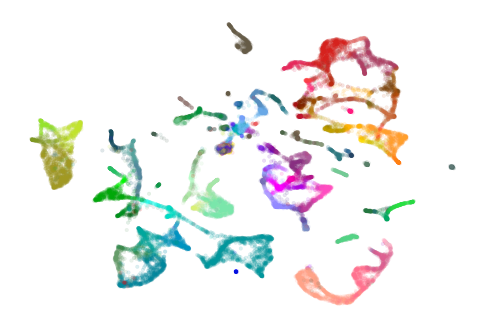

In [7]:
_ = embed_pipeline.run("tasic2018")